# Lecture 20 September 2024

In [1]:
import tensorflow as tf
import keras 

In [2]:
print(f"tensorflow ver {tf.__version__}")
print(f"keras ver: {keras.__version__}")

tensorflow ver 2.17.0
keras ver: 3.5.0


# Linear Classification
### Problem: Patients have malignant breast cancer or not

In [3]:
#!pip install scikit-learn

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
# load dataset
df = load_breast_cancer()
type(df)

sklearn.utils._bunch.Bunch

**Note**: This is a `bunch` object.
- Similar idea of dictionary format

In [6]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(f"The shape of the data: {df.data.shape}")

The shape of the data: (569, 30)


In [8]:
# 0: benign
# 1: malignant
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
import numpy as np

In [10]:
df.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
print(df.feature_names.shape)
df.feature_names

(30,)


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
# let's split the data into a training and test datasets
from sklearn.model_selection import train_test_split

In [13]:
# ready to use train_test_split function to split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=1/3)
N, D = X_train.shape
print(N, D)

379 30


Standardizing variables leads to less bias...

In [14]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# build the model using tensorflow
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)), # input layer with 30 features
    tf.keras.layers.Dense(1, activation='sigmoid') # output layer with 1 node for classification
])

In [17]:
# alternatively... (if ur old)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer = 'adam', #ADAM: Adaptive Moment Estimation
              loss = 'binary_crossentropy',
              metrics = ['accuracy']
              )

In [19]:
# ready to train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6643 - loss: 0.6149 - val_accuracy: 0.8158 - val_loss: 0.5115
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7583 - loss: 0.5339 - val_accuracy: 0.8579 - val_loss: 0.4599
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7624 - loss: 0.5015 - val_accuracy: 0.8789 - val_loss: 0.4163
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8446 - loss: 0.4240 - val_accuracy: 0.8789 - val_loss: 0.3803
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8947 - loss: 0.3636 - val_accuracy: 0.8947 - val_loss: 0.3507
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8843 - loss: 0.3713 - val_accuracy: 0.9211 - val_loss: 0.3259
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9091 - loss: 0.3231 - val_accuracy: 0.9263 - val_loss: 0.3058
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9053 - loss: 0.3002 - val_accuracy: 0.9316 - 

In [20]:
print(f"Train score: {model.evaluate(X_train, y_train)}")
print(f"Test score: {model.evaluate(X_test, y_test)}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9850 - loss: 0.0771 
Train score: [0.06598331034183502, 0.9920844435691833]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9692 - loss: 0.1021 
Test score: [0.1270391196012497, 0.9631578922271729]


In [21]:
# plot of loss history
import matplotlib.pyplot as plt

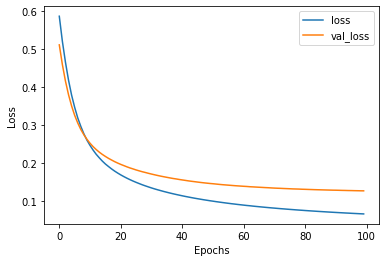

In [22]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label= 'val_loss')

# adding x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# adding legend
plt.legend()

plt.show()

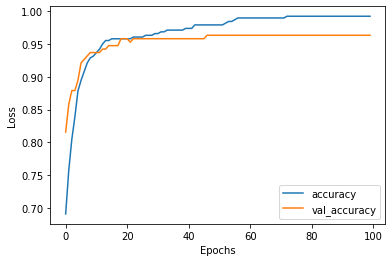

In [23]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')

# adding x and y labels
plt.xlabel('Epochs')
plt.ylabel('Loss')

# adding legend
plt.legend()

plt.show()

### Making predictions

In [24]:
P = model.predict(X_test)
print(P)
print(P.shape)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
[[9.61845040e-01]
 [1.45072362e-03]
 [1.01467285e-05]
 [1.45548609e-06]
 [3.37023377e-01]
 [5.00209222e-04]
 [9.99016881e-01]
 [3.32837179e-02]
 [6.80029765e-02]
 [2.14128977e-06]
 [9.76845145e-01]
 [9.99319136e-01]
 [2.25276593e-02]
 [3.93177330e-01]
 [1.74604205e-03]
 [7.96277106e-01]
 [9.67431903e-01]
 [6.73690662e-02]
 [2.95825958e-01]
 [4.95910533e-02]
 [8.56743872e-01]
 [9.48001683e-01]
 [1.03559229e-03]
 [9.98914475e-05]
 [9.65567231e-01]
 [9.97354150e-01]
 [7.92187452e-02]
 [9.98337567e-01]
 [3.16101905e-05]
 [5.15303283e-04]
 [9.92263973e-01]
 [8.07066272e-08]
 [9.99431193e-01]
 [9.40761089e-01]
 [9.59501624e-01]
 [8.84809488e-05]
 [9.99544382e-01]
 [9.99728024e-01]
 [7.13565052e-02]
 [9.97984946e-01]
 [1.98367215e-03]
 [8.42740238e-01]
 [9.99376833e-01]
 [9.97836828e-01]
 [9.97502446e-01]
 [9.97785389e-01]
 [9.97922957e-01]
 [9.98291969e-01]
 [9.93572414e-01]
 [9.87172127e-01]
 [9.99072731e-01]
 [9.12498042e-04]
 [9.70540643e-01]
 [8.5580

In [25]:
P = np.round(P).flatten()
print(P)
print(P.shape)

[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
(190,)


In [26]:
print("Manually calculated accuracy (validation data = test data)", np.mean(P == y_test))
print("From actual model", model.evaluate(X_test, y_test))

Manually calculated accuracy (validation data = test data) 0.9631578947368421
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.1021 
From actual model [0.1270391196012497, 0.9631578922271729]


In [27]:
#model.save('logistic.classifier.keras')

#check
!dir

 Volume in drive C has no label.
 Volume Serial Number is 9C36-259D

 Directory of c:\Users\ntlmp\STAT479-AppliedNeuralNetworksDeepLearning\LabNotes

10/12/2024  12:06 PM    <DIR>          .
10/12/2024  12:01 PM    <DIR>          ..
10/12/2024  12:05 PM            12,008 Lec0906.ipynb
09/25/2024  02:47 PM           194,723 Lec0920.ipynb
10/12/2024  12:06 PM            11,838 logistic.classifier.keras
               3 File(s)        218,569 bytes
               2 Dir(s)  152,072,654,848 bytes free


In [28]:
#let's load the model and confirm that it still works
model = tf.keras.models.load_model(r"C:\\Users\\ntlmp\\Desktop\\STAT479 AppliedNeuralNetworksDeepLearning\\logistic.classifier.keras")

c:\Users\ntlmp\AppData\Local\R-MINI~1\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Linear Regression

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
import urllib.request

In [31]:
url = 'http://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv'

In [32]:
urllib.request.urlretrieve(url, 'moore.csv')
print("download is complete")

download is complete


In [33]:
data = pd.read_csv('moore.csv', header=None).values
print(data.shape)

(162, 2)


In [34]:
# reshape the data with 2D array of size N by 1
X = data[:,0].reshape(-1, 1)
print(X.shape)
Y = data[:,1]
print(Y.shape)

(162, 1)
(162,)


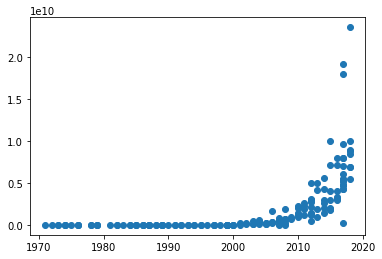

In [35]:
plt.scatter(X, Y)

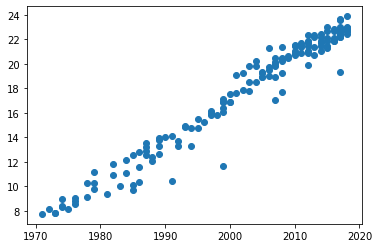

In [36]:
Y = np.log(Y)
plt.scatter(X, Y)

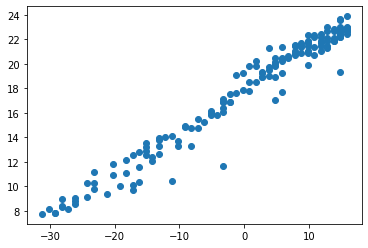

In [37]:
# let's apply centering to X
X = X - X.mean()
plt.scatter(X, Y)

In [38]:
# build our model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)), #only 1 feature
    tf.keras.layers.Dense(1) # 1 regression output
])

In [39]:
model.compile(optimizer = tf.keras.optimizers.SGD(.001, .9), # (learning rate, momentum)
              loss = 'mse')

In [40]:
# let's change the learning rate
def schedule(epoch, lr):
    if epoch >= 50:
        return .0001
    return .001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 368.9546 - learning_rate: 0.0010
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 542.6573 - learning_rate: 0.0010
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 706.0531 - learning_rate: 0.0010
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 405.8729 - learning_rate: 0.0010
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 227.3803 - learning_rate: 0.0010
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 162.6552 - learning_rate: 0.0010
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.5173 - learning_rate: 0.0010
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 73.6806 - learning_rate: 0.0010
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.6916 - learning_rate: 0.0010
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.0630 - learning_rate: 0.0010
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.1872 - learning_rate: 0.0010
Epoch 12/200

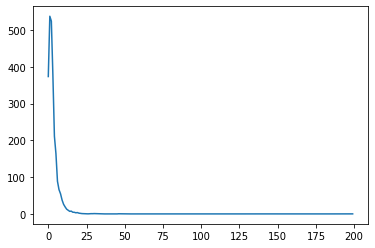

In [41]:
# plot the loss
plt.plot(r.history['loss'], label='loss')

In [42]:
# get the slope of the regression line
print(model.layers)
print(model.layers[0].get_weights())

[<Dense name=dense_2, built=True>]
[array([[0.35537544]], dtype=float32), array([17.74035], dtype=float32)]


The weight would be .341 and b = 17.766.

In [43]:
# retrieve the slope
a = model.layers[0].get_weights()[0][0][0]
print(a)

0.35537544


$$ C = A_0 \cdot r^t $$

$$ \log C = t \cdot \log r + \log A_0 $$

$$ \hat{y} = \log C $$
$$ a = \log r $$
$$ x = t $$
$$ b = \log A_0 $$

$$ a = \log r = 0.34127447 $$
$$ r = e^{.34127447} = 1.4 $$

# Making predictions

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


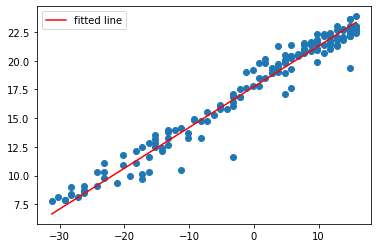

In [44]:
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat, color='r', label='fitted line')
plt.legend()
plt.show()

In [45]:
# manual calculation
w, b = model.layers[0].get_weights()
print(w, b)

[[0.35537544]] [17.74035]
